In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [39]:
data  = pd.read_csv('hiring.csv')
data.head(8)

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,five,8.0,6,45000
2,two,6.0,7,60000
3,seven,10.0,10,65000
4,three,9.0,6,70000
5,ten,7.0,10,62000
6,eleven,NaN,7,72000
7,NaN,7.0,8,80000


In [40]:
data.at[0, 'experience',] = 'one'
data.at[7, 'experience',] = 'four'
data.at[6,  'test_score',] = 5.0
data.head(8)

,experience,test_score,interview_score,salary
0,one,8.0,9,50000
1,five,8.0,6,45000
2,two,6.0,7,60000
3,seven,10.0,10,65000
4,three,9.0,6,70000
5,ten,7.0,10,62000
6,eleven,5.0,7,72000
7,four,7.0,8,80000


In [41]:
mapping = {'one':1,'two':2, 'three':3,  'four' : 4, 'five': 5, 'seven': 7, 'ten': 10, 'eleven': 11}
data['experience'] = data['experience'].map(mapping)
data.head(8)

,experience,test_score,interview_score,salary
0,1,8.0,9,50000
1,5,8.0,6,45000
2,2,6.0,7,60000
3,7,10.0,10,65000
4,3,9.0,6,70000
5,10,7.0,10,62000
6,11,5.0,7,72000
7,4,7.0,8,80000


In [71]:
Y = data["salary"]
X = data.drop(["salary"], axis=1)

In [67]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y, test_size= 0.2)

In [68]:
from sklearn import tree

DT_model =  tree.DecisionTreeRegressor()
DT_model.fit(X_train,Y_train)

DecisionTreeRegressor()

[Text(0.5, 0.9, 'test_score <= 7.5\nsquared_error = 122138888.889\nsamples = 6\nvalue = 64833.333'),
 Text(0.25, 0.7, 'experience <= 3.0\nsquared_error = 64750000.0\nsamples = 4\nvalue = 68500.0'),
 Text(0.125, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 60000.0'),
 Text(0.375, 0.5, 'interview_score <= 9.0\nsquared_error = 54222222.222\nsamples = 3\nvalue = 71333.333'),
 Text(0.25, 0.3, 'test_score <= 6.0\nsquared_error = 16000000.0\nsamples = 2\nvalue = 76000.0'),
 Text(0.125, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 72000.0'),
 Text(0.375, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 80000.0'),
 Text(0.5, 0.3, 'squared_error = 0.0\nsamples = 1\nvalue = 62000.0'),
 Text(0.75, 0.7, 'test_score <= 8.5\nsquared_error = 156250000.0\nsamples = 2\nvalue = 57500.0'),
 Text(0.625, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 45000.0'),
 Text(0.875, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 70000.0')]

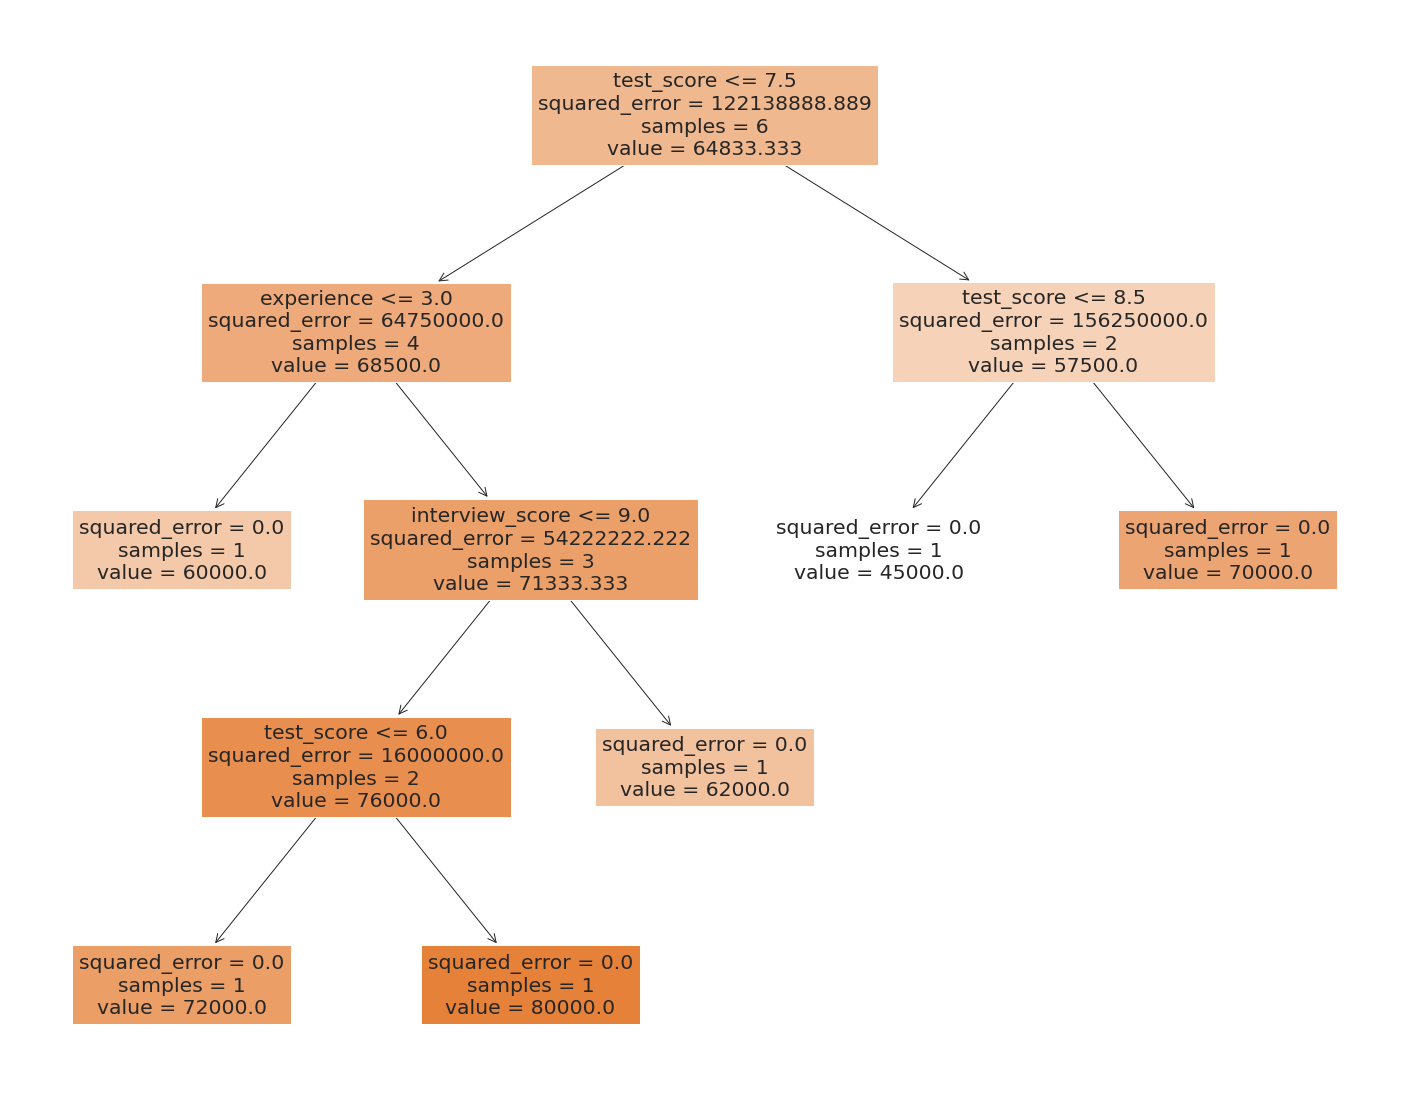

In [69]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(DT_model, 
                   feature_names=X.columns,  
                   class_names='salary',
                   filled=True)

In [70]:
print(DT_model.predict(X_test))
print(Y_test)

[70000. 45000.]
3    65000
0    50000
Name: salary, dtype: int64
